In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('seattle-weather.csv')
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [ ]:
#df = pd.read_csv('seattle-weather.csv')
#encoder = LabelEncoder()
#encoder.fit(df['weather'])
#labels = encoder.transform(df['weather'])
#df['weather'] = labels
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('seattle-weather.csv')

# Initialize the LabelEncoder
encoder = LabelEncoder()

# Fit the encoder on the weather column and transform the labels
encoder.fit(df['weather'])
df['weather'] = encoder.transform(df['weather'])

# Create a mapping of encoded labels to original labels
label_mapping = dict(zip(range(len(encoder.classes_)), encoder.classes_))

# Print the mapping
print("Label mapping:", label_mapping)
df['weather'] = labels

df

Label mapping: {0: 'drizzle', 1: 'fog', 2: 'rain', 3: 'snow', 4: 'sun'}


,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,0
1,2012-01-02,10.9,10.6,2.8,4.5,2
2,2012-01-03,0.8,11.7,7.2,2.3,2
3,2012-01-04,20.3,12.2,5.6,4.7,2
4,2012-01-05,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,2
1457,2015-12-28,1.5,5.0,1.7,1.3,2
1458,2015-12-29,0.0,7.2,0.6,2.6,1
1459,2015-12-30,0.0,5.6,-1.0,3.4,4


In [ ]:
df.isnull().sum()

,0
date,0
precipitation,0
temp_max,0
temp_min,0
wind,0
weather,0


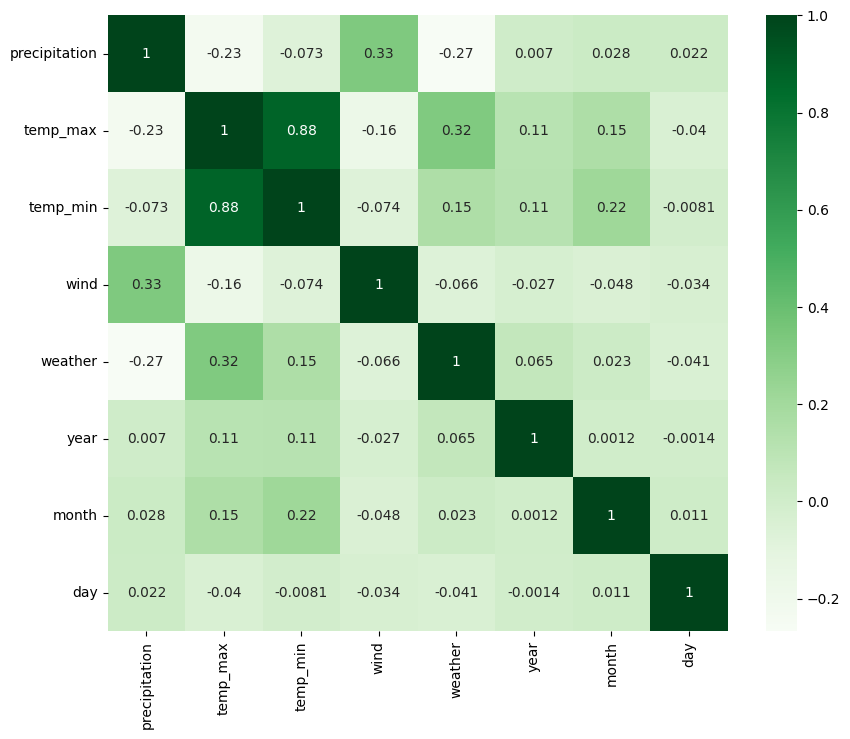

In [ ]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract year, month, and day as separate features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Drop the original date column
df = df.drop('date', axis=1)

# Now calculate the correlation on the updated DataFrame
numeric_df = df.select_dtypes(include=[np.number])

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Greens')
plt.show()


In [ ]:
x=df.drop(['year','month','day','weather'],axis=1)
y=df['weather']
x

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1
...,...,...,...,...
1456,8.6,4.4,1.7,2.9
1457,1.5,5.0,1.7,1.3
1458,0.0,7.2,0.6,2.6
1459,0.0,5.6,-1.0,3.4


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [ ]:
lr=LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)
pred_1=lr.predict(x_test)
acc_1=accuracy_score(y_test,pred_1)
acc_1

0.8088737201365188

In [ ]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_2=rfc.predict(x_test)
acc_2=accuracy_score(y_test,pred_2)
acc_2

0.764505119453925

In [ ]:
for i in range(1,21):
      knn=KNeighborsClassifier(n_neighbors=i)
      knn.fit(x_train,y_train)
      preds=knn.predict(x_test)
      acc_3=accuracy_score(y_test,preds)
acc_3

0.6996587030716723

Unique classes in y_test: [0 1 2 3 4]
Unique classes in preds: [2 4]


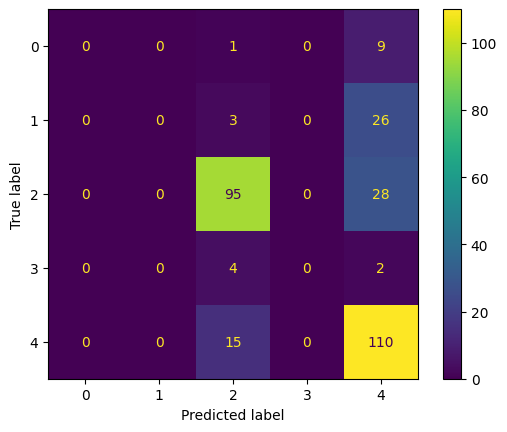

In [ ]:
# Check unique classes in y_test and preds
print("Unique classes in y_test:", np.unique(y_test))
print("Unique classes in preds:", np.unique(preds))

# Calculate the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, preds)

# Adjust display labels based on the unique classes found
# Assuming you have more than two classes, you should list all unique classes
unique_labels = np.unique(y_test)  # Get unique labels from y_test

# Create confusion matrix display
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=unique_labels)

# Plot the confusion matrix
cm_display.plot()
plt.show()


In [ ]:
from sklearn.metrics import f1_score

# Calculate F1 score with the 'weighted' average

f1 = f1_score(y_test, preds, average='weighted')
print("F1 score:", f1)


F1 score: 0.6438144062235943


In [ ]:
# Calculate precision for each class separately
#precision_per_class = precision_score(y_test, preds,average=None)
precision = precision_score(y_test, preds, average='weighted')
print(f"Precision: {precision:.2f}")


Precision: 0.61


In [ ]:
# Calculate recall for each class separately
#recall_per_class = recall_score(y_test, preds, average=None)
recall = recall_score(y_test, preds, average='weighted')
#print("Recall per class:", recall_per_class)
print(f"Recall: {recall:.2f}")


Recall: 0.70


In [ ]:
new_weather_data = [[0,	13,	5,	5]]


# Make a prediction
prediction = knn.predict(new_weather_data)

# Get the original weather label from the label mapping
label_mapping = {0: 'drizzle', 1: 'fog', 2: 'rain', 3: 'snow', 4: 'sun'}
predicted_weather = label_mapping[prediction[0]]

# Output the prediction
print(f"The predicted weather is: {predicted_weather}")

The predicted weather is: sun


In [ ]:
svm = svm.SVC(max_iter=10000)
svm.fit(x_train, y_train)
pred_2 = svm.predict(x_test)
acc_4 = accuracy_score(y_test, pred_2)
acc_4


0.726962457337884